<a href="https://colab.research.google.com/github/DariaHrebeniuk17/numerical_methods/blob/main/%D0%9B%D0%B0%D0%B1_8_%D0%93%D1%80%D0%B5%D0%B1%D0%B5%D0%BD%D1%8E%D0%BA_%D0%94_%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №8. Числове диференціювання. Гребенюк Дар'я Сергіївна, ФІТ 2-8. Робила на парі
Варіант 5.

1. спосіб.

In [4]:
import numpy as np

x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155])

h = x_values[1] - x_values[0]

def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    return delta_y

delta_table = finite_differences(y_values)

print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)

delta_y1 = delta_table[0, 1]
delta2_y1 = delta_table[0, 2]
delta3_y1 = delta_table[0, 3]
delta4_y1 = delta_table[0, 4]

def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h

def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1  + 11*delta4_y1 / 12) / h**2

y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)

y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)

print(f"\nПерша похідна y'(0.1) ≈ {y1_prime}")
print(f"Друга похідна y''(0.1) ≈ {y1_double_prime}")


Таблиця кінцевих різниць:
[[ 3.526  0.256 -0.093  0.028 -0.    -0.001]
 [ 3.782  0.163 -0.065  0.028 -0.001  0.   ]
 [ 3.945  0.098 -0.037  0.027  0.     0.   ]
 [ 4.043  0.061 -0.01   0.     0.     0.   ]
 [ 4.104  0.051  0.     0.     0.     0.   ]
 [ 4.155  0.     0.     0.     0.     0.   ]]

Перша похідна y'(0.1) ≈ 1.559
Друга похідна y''(0.1) ≈ -3.025


2. спосіб

In [5]:
import numpy as np

x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155])

h = x_values[1] - x_values[0]

first_derivative = (y_values[1:] - y_values[:-1]) / h

second_derivative = (first_derivative[1:] - first_derivative[:-1]) / h

print("Перша похідна:")
print("x = 0.1:", round(first_derivative[0],3))

print("Друга похідна:")
print("x = 0.1:", round(second_derivative[0], 3))

Перша похідна:
x = 0.1: 1.28
Друга похідна:
x = 0.1: -2.325


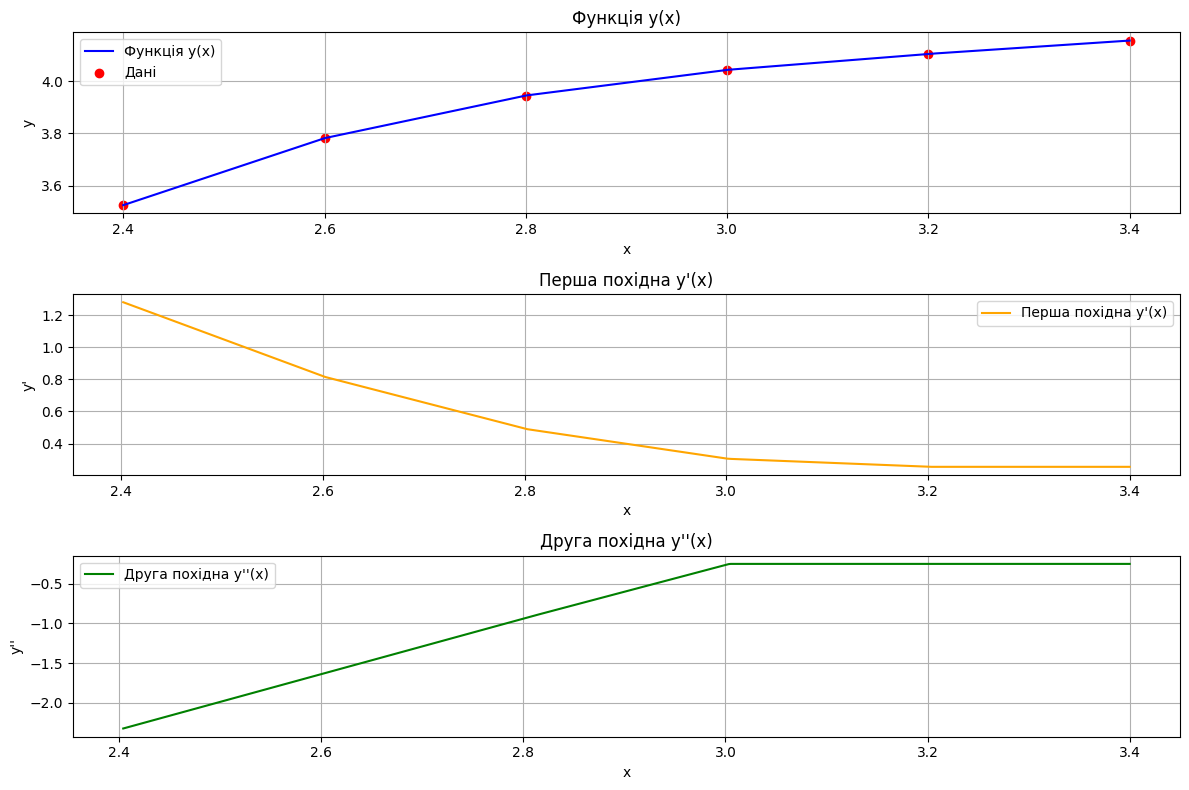

In [9]:
import matplotlib.pyplot as plt
x_fine = np.linspace(x_values[0], x_values[-1], 500)
y_fine = np.interp(x_fine, x_values, y_values)

first_deriv_fine = np.interp(x_fine[:-1], x_values[:-1], first_derivative)
second_deriv_fine = np.interp(x_fine[:-2], x_values[:-2], second_derivative)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x_fine, y_fine, label='Функція y(x)', color='blue')
plt.scatter(x_values, y_values, color='red', label='Дані')
plt.title('Функція y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x_fine[1:], first_deriv_fine, label="Перша похідна y'(x)", color='orange')
plt.title("Перша похідна y'(x)")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(x_fine[2:], second_deriv_fine, label="Друга похідна y''(x)", color='green')
plt.title("Друга похідна y''(x)")
plt.xlabel('x')
plt.ylabel("y''")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()